In [2]:
import torch, detectron2
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

import random
import cv2
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from PIL import Image
import PIL
import os
from matplotlib import pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
PIL.Image.MAX_IMAGE_PIXELS = None

In [4]:
register_coco_instances("CDLI_line_dataset_train", {}, "data_retrieval/annotations/CDLI_line_annotations.json", "data_retrieval/data/CDLI_images/segments/train/")
register_coco_instances("CDLI_line_dataset_test", {}, "data_retrieval/annotations/CDLI_line_annotations_test.json", "data_retrieval/data/CDLI_images/segments/test/")
register_coco_instances("line_dataset_val", {}, "data_retrieval/annotations/val_line_annotations.json", "data_retrieval/data/CDLI_images/segments/val/")

In [5]:
register_coco_instances("EBL_line_dataset_train", {}, "data_retrieval/annotations/train_line_annotations.json", "data_retrieval/data/CDLI_images/segments/train/")
register_coco_instances("EBL_line_dataset_test", {}, "data_retrieval/annotations/test_line_annotations_test.json", "data_retrieval/data/CDLI_images/segments/test/")

In [6]:
from detectron2.engine import DefaultTrainer
class TrainerWithEvaluator(DefaultTrainer):

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("CDLI_line_dataset_train", "EBL_line_dataset_train") 
cfg.DATASETS.TEST = ("line_dataset_val",)
cfg.TEST.EVAL_PERIOD = 500
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.STEPS = []        
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = TrainerWithEvaluator(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[12/21 16:32:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

[12/21 16:32:17 d2.engine.train_loop]: Starting training from iteration 0


e:\Anaconda\envs\Babylon\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/21 16:32:33 d2.utils.events]:  eta: 1:02:03  iter: 19  total_loss: 8.168  loss_cls: 0.7778  loss_box_reg: 0.01729  loss_rpn_cls: 6.378  loss_rpn_loc: 0.8123    time: 0.4487  last_time: 0.3449  data_time: 0.3244  last_data_time: 0.0004   lr: 4.9953e-06  max_mem: 1585M
[12/21 16:32:51 d2.utils.events]:  eta: 1:02:09  iter: 39  total_loss: 5.451  loss_cls: 0.713  loss_box_reg: 0.02162  loss_rpn_cls: 3.322  loss_rpn_loc: 0.8789    time: 0.6315  last_time: 0.3686  data_time: 0.4527  last_data_time: 0.0008   lr: 9.9902e-06  max_mem: 1585M
[12/21 16:33:18 d2.utils.events]:  eta: 1:01:16  iter: 59  total_loss: 2.495  loss_cls: 0.6582  loss_box_reg: 0.1599  loss_rpn_cls: 1.127  loss_rpn_loc: 0.7313    time: 0.8553  last_time: 0.3306  data_time: 0.9162  last_data_time: 0.0009   lr: 1.4985e-05  max_mem: 1866M
[12/21 16:33:40 d2.utils.events]:  eta: 0:59:21  iter: 79  total_loss: 2.094  loss_cls: 0.5776  loss_box_reg: 0.2629  loss_rpn_cls: 0.3921  loss_rpn_loc: 0.8003    time: 0.9144  last_tim

KeyboardInterrupt: 

In [13]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[12/21 11:43:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...


WARNING [12/21 11:46:03 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/21 11:46:03 d2.data.datasets.coco]: Loaded 10 images in COCO format from data_retrieval/CDLI_line_annotations_test.json


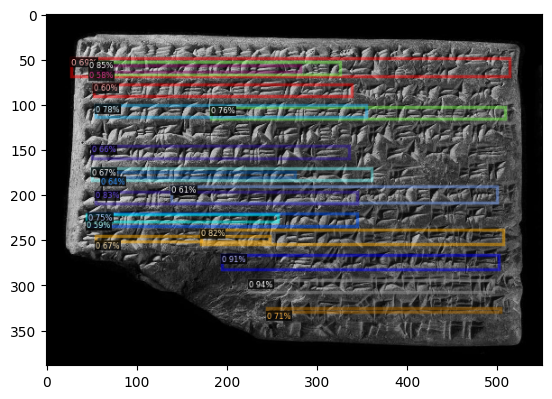

In [20]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("line_dataset_test")

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

In [37]:
from PIL.Image import fromarray
import numpy as np
im = cv2.imread("data_retrieval\data\K.2.jpeg")
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                   scale=0.5
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
image = fromarray(out.get_image())
image.show()